In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

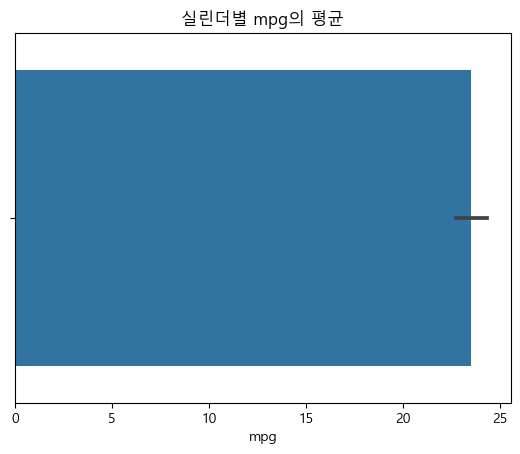

In [64]:
#1) 실린더별 mpg의 평균을 막대그래프로 그리세요.
mpg = sns.load_dataset('mpg') 
sns.barplot(x=mpg['mpg'],data=mpg)
plt.title('실린더별 mpg의 평균')
plt.show()

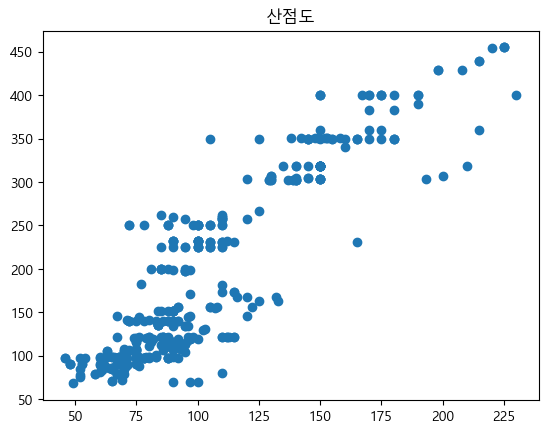

In [65]:
#배기량(displacement)과 마력(horsepower)의 산점도를 그리세요.
x=(mpg['horsepower'])
y=(mpg['displacement'])
plt.scatter(x,y)
plt.title('산점도')
plt.show()

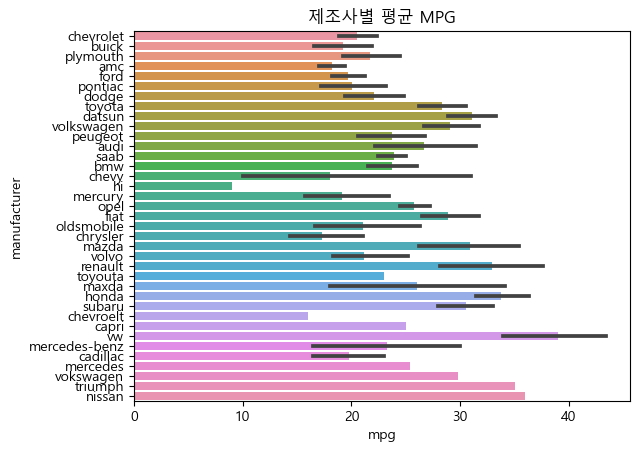

In [66]:
#3) name 컬럼으로부터 제조사를 추출하세요.
mpg['manufacturer'] = mpg.name.apply(lambda x: x.split()[0])
sns.barplot(y='manufacturer', x='mpg', data=mpg)
plt.title('제조사별 평균 MPG');

In [67]:
print(mpg.shape)
mpg.head()


(398, 10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


In [68]:
mpg['model'] = mpg.name.apply(lambda x: x.split()[1:])
mpg.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,"[chevelle, malibu]"
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,"[skylark, 320]"
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,[satellite]


In [69]:
#- 제조사별 모델의 개수(Top 10)를 막대그래프로 그리세요.
# -제조사별 mpg의 평균(Top 10)을 막대그래프로 그리세요.
df6 =mpg.pivot_table('model','manufacturer',aggfunc='sum').sort_values(by='model',ascending=False)
df6.head(10)

,model
manufacturer,
triumph,"[tr7, coupe]"
ford,"[torino, galaxie, 500, maverick, f250, pinto, ..."
nissan,"[stanza, xe]"
buick,"[skylark, 320, estate, wagon, (sw), lesabre, c..."
cadillac,"[seville, eldorado]"
plymouth,"[satellite, fury, iii, 'cuda, 340, duster, sat..."
maxda,"[rx3, glc, deluxe]"
mazda,"[rx2, coupe, rx-4, glc, deluxe, 626, glc, rx-7..."
amc,"[rebel, sst, ambassador, dpl, hornet, gremlin,..."


In [70]:
df6 =df.pivot_table('구독자수','카테고리',aggfunc='sum').sort_values(by='구독자수',ascending=False)
df6.head(10)
sns.barplot(y=df6.index[:10], x=df6.구독자수.head(10));

KeyError: '구독자수'

In [71]:
import folium
import pandas as pd

In [72]:
df = pd.read_csv('../04. 지도시각화/data/경기도청사및출장소현황.csv',encoding='euc-kr')
df.head()

,집계일자,시군명,구분명,전화번호안내,소재지우편번호,소재지도로명주소,소재지지번주소,WGS84위도,WGS84경도
0,2023-03-08,안성시,안성시청,031-678-2114,17586,경기도 안성시 시청길 25,경기도 안성시 봉산동 31-3번지,37.007357,127.280313
1,2023-03-08,안성시,고삼면,031-678-3980,17505,경기도 안성시 고삼면 고삼호수로 21,경기도 안성시 고삼면 가유리 287-11번지,37.082693,127.263456
2,2023-03-08,안성시,공도읍,031-678-3610,17560,경기도 안성시 공도4로 8,경기도 안성시 공도읍 만정리 793-1번지,37.001014,127.172515
3,2023-03-08,안성시,보개면,031-678-3680,17509,경기도 안성시 보개면 보개원삼로 220,경기도 안성시 보개면 불현리 42-1번지,37.023016,127.290858
4,2023-03-08,안성시,금광면,031-678-3710,17536,경기도 안성시 금광면 금광오산로 228,경기도 안성시 금광면 내우리 20-9번지,36.997233,127.317531


In [73]:
df=df[['구분명','소재지도로명주소']]
df.head()

,구분명,소재지도로명주소
0,안성시청,경기도 안성시 시청길 25
1,고삼면,경기도 안성시 고삼면 고삼호수로 21
2,공도읍,경기도 안성시 공도4로 8
3,보개면,경기도 안성시 보개면 보개원삼로 220
4,금광면,경기도 안성시 금광면 금광오산로 228


In [83]:
df = df[df['구분명'].str.contains("시청|구청|도청")]
df.head()

,구분명,소재지도로명주소
0,안성시청,경기도 안성시 시청길 25
17,단원구청,경기도 안산시 단원구 중앙대로 685 (초지동)
22,안산시청,경기도 안산시 단원구 화랑로 387 (고잔동)
42,상록구청,경기도 안산시 상록구 석호로 110 (사동)
52,군포시청,경기도 군포시 청백리길 6


In [75]:
map.to_csv('시구도.csv',index=False)

In [76]:
import requests
from urllib.parse import quote
import pandas as pd
with open('../04. 지도시각화/data/kakaoapikey.txt') as f:
    kakao_key =f.read()

In [77]:
base_url ='https://dapi.kakao.com/v2/local/search/address.json'
addr ='경기도 안성시 시청길 25'                #샘플
url = f'{base_url}?query={quote(addr)}'
url

'https://dapi.kakao.com/v2/local/search/address.json?query=%EA%B2%BD%EA%B8%B0%EB%8F%84%20%EC%95%88%EC%84%B1%EC%8B%9C%20%EC%8B%9C%EC%B2%AD%EA%B8%B8%2025'

In [78]:
header = {'Authorization':f'KakaoAK {kakao_key}'}

In [79]:
result = requests.get(url, headers=header).json()
result

{'documents': [{'address': {'address_name': '경기 안성시 봉산동 31-3',
    'b_code': '4155010100',
    'h_code': '4155051000',
    'main_address_no': '31',
    'mountain_yn': 'N',
    'region_1depth_name': '경기',
    'region_2depth_name': '안성시',
    'region_3depth_h_name': '안성1동',
    'region_3depth_name': '봉산동',
    'sub_address_no': '3',
    'x': '127.279209977315',
    'y': '37.0083078624137'},
   'address_name': '경기 안성시 시청길 25',
   'address_type': 'ROAD_ADDR',
   'road_address': {'address_name': '경기 안성시 시청길 25',
    'building_name': '안성시청',
    'main_building_no': '25',
    'region_1depth_name': '경기',
    'region_2depth_name': '안성시',
    'region_3depth_name': '봉산동',
    'road_name': '시청길',
    'sub_building_no': '',
    'underground_yn': 'N',
    'x': '127.279209977315',
    'y': '37.0083078624137',
    'zone_no': '17586'},
   'x': '127.279209977315',
   'y': '37.0083078624137'}],
 'meta': {'is_end': True, 'pageable_count': 1, 'total_count': 1}}

In [80]:
lat = float(result['documents'][0]['y'])
lng = float(result['documents'][0]['x'])
lat,lng

(37.0083078624137, 127.279209977315)

In [85]:
lat_list,lng_list =[],[]
for i in df.index:
    url = f'{base_url}?query={quote(df.소재지도로명주소[i])}'
    result = requests.get(url, headers=header).json()
    lat_list.append(float(result['documents'][0]['y']))
    lng_list.append(float(result['documents'][0]['x']))

In [87]:
df['위도'] = lat_list
df['경도'] = lng_list
df

,구분명,소재지도로명주소,위도,경도
0,안성시청,경기도 안성시 시청길 25,37.008308,127.279210
17,단원구청,경기도 안산시 단원구 중앙대로 685 (초지동),37.319777,126.811755
22,안산시청,경기도 안산시 단원구 화랑로 387 (고잔동),37.322557,126.832714
42,상록구청,경기도 안산시 상록구 석호로 110 (사동),37.301335,126.846410
52,군포시청,경기도 군포시 청백리길 6,37.361023,126.935316
62,광주시청,경기도 광주시 행정타운로 50,37.429288,127.255069
77,장안구청,경기도 수원시 장안구 송원로 101,37.304095,127.010401
91,영통구청,경기도 수원시 영통구 효원로 407,37.259599,127.046508
106,권선구청,경기도 수원시 권선구 호매실로 12,37.257634,126.971898
114,수원시청,경기도 수원시 팔달구 효원로 241,37.263454,127.028662


In [89]:
map = folium.Map(location=[df.위도.mean(),df.경도.mean()], zoom_start=12)
for i in df.index:
    folium.Circle(
        location=[df.위도[i],df.경도[i]],
        popup=folium.Popup(df.소재지도로명주소[i],max_width=200),
        tooltip=df.구분명[i],
    
    ).add_to(map)
title_html ='<h3 align="center" style ="font-size:20px">수원 소재 주요 관광서</h3>'
map.get_root().html.add_child(folium.Element(title_html))
map